In [55]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, CategoricalEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline, make_union, Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.ensemble import RandomForestClassifier

- Загрузка данных
- Описание
- Визуализация
- Признаки
    - PassengerId
    - Pclass
    - Name
        - Title
        - Surname
    - Sex
    - Age
        - Age_Bin
    - SibSp
    - Parch
    - Family_Size
    - Ticket
    - Fare
        - Fare_Bin
    - Cabin
        - Cabin_Category
        - Cabin_Number
    - Embarked
    - Full_Info
- Пропущенные значения
- Выбор и преобразование/генерация признаков
- Поиск модели и подбор параметров с использованием кросс-валидации
- Обучение выбранной модели на всей обучающей выборке и предсказание на тестовых данных
- Загрузка данных на Kaggle

### Загрузка данных

In [4]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

### Анализ данных

In [5]:
train_df = train_data.copy()
test_df = test_data.copy()

#### Описание

In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Наименование | Описание | Комментарий | Тип признака
---          | ---      | ---         | --- 
**Survived** | Целевая переменная. Признак, выжил пассажир или нет | 0 - не выжил, 1 - выжил                       | Бинарный
**PassengerId** | Идентификатор пассажира                          |                                               | Номинальный
**Pclass**   | Класс палубы                                        | 1 - 1й класс, 2 - 2й класс, 3 - 3й класс      | Порядковый
**Name**   | Фамилия и имя пассажира                               |                                               | Номинальный
**Sex**      | Пол пассажира                                       |                                               | Номинальный 
**Age**      | Возраст пассажира                                   |                                               | Количественный  
**SibSp**    | Кол-во братьев/сестер и супругов пассажира на борту |                                               | Количественный
**Parch**    | Кол-во родителей/детей пассажира на борту           |                                               | Количественный
**Ticket**   | Номер билета пассажира                              |                                               | Номинальный
**Fare**     | Стоимость билета пассажира                          |                                               | Количественный
**Cabin**    | Номер каюты                                         |                                               | Номинальный
**Embarked** | Порт посадки пассажира на борт                      | C = Cherbourg, Q = Queenstown, S = Southampton | Номинальный

**TODO**: проверить доп. описание датасета по колонкам (на Kaggle)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Train dataset**  
**Всего записей**: 891  
**Пропущенные значения**: Age (177), Cabin (687), Embarked (2)

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sivic, Mr. Husein",male,1601,G6,S
freq,1,577,7,4,644


In [10]:
report = ProfileReport(train_df)
report

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,7
Categorical,4
Date,0
Text (Unique),1
Rejected,0
Distinct count,89


#### Визуализация

- Распределение признаков в разрезе целевой переменной
- HeatMap с корреляцией признаков

[]

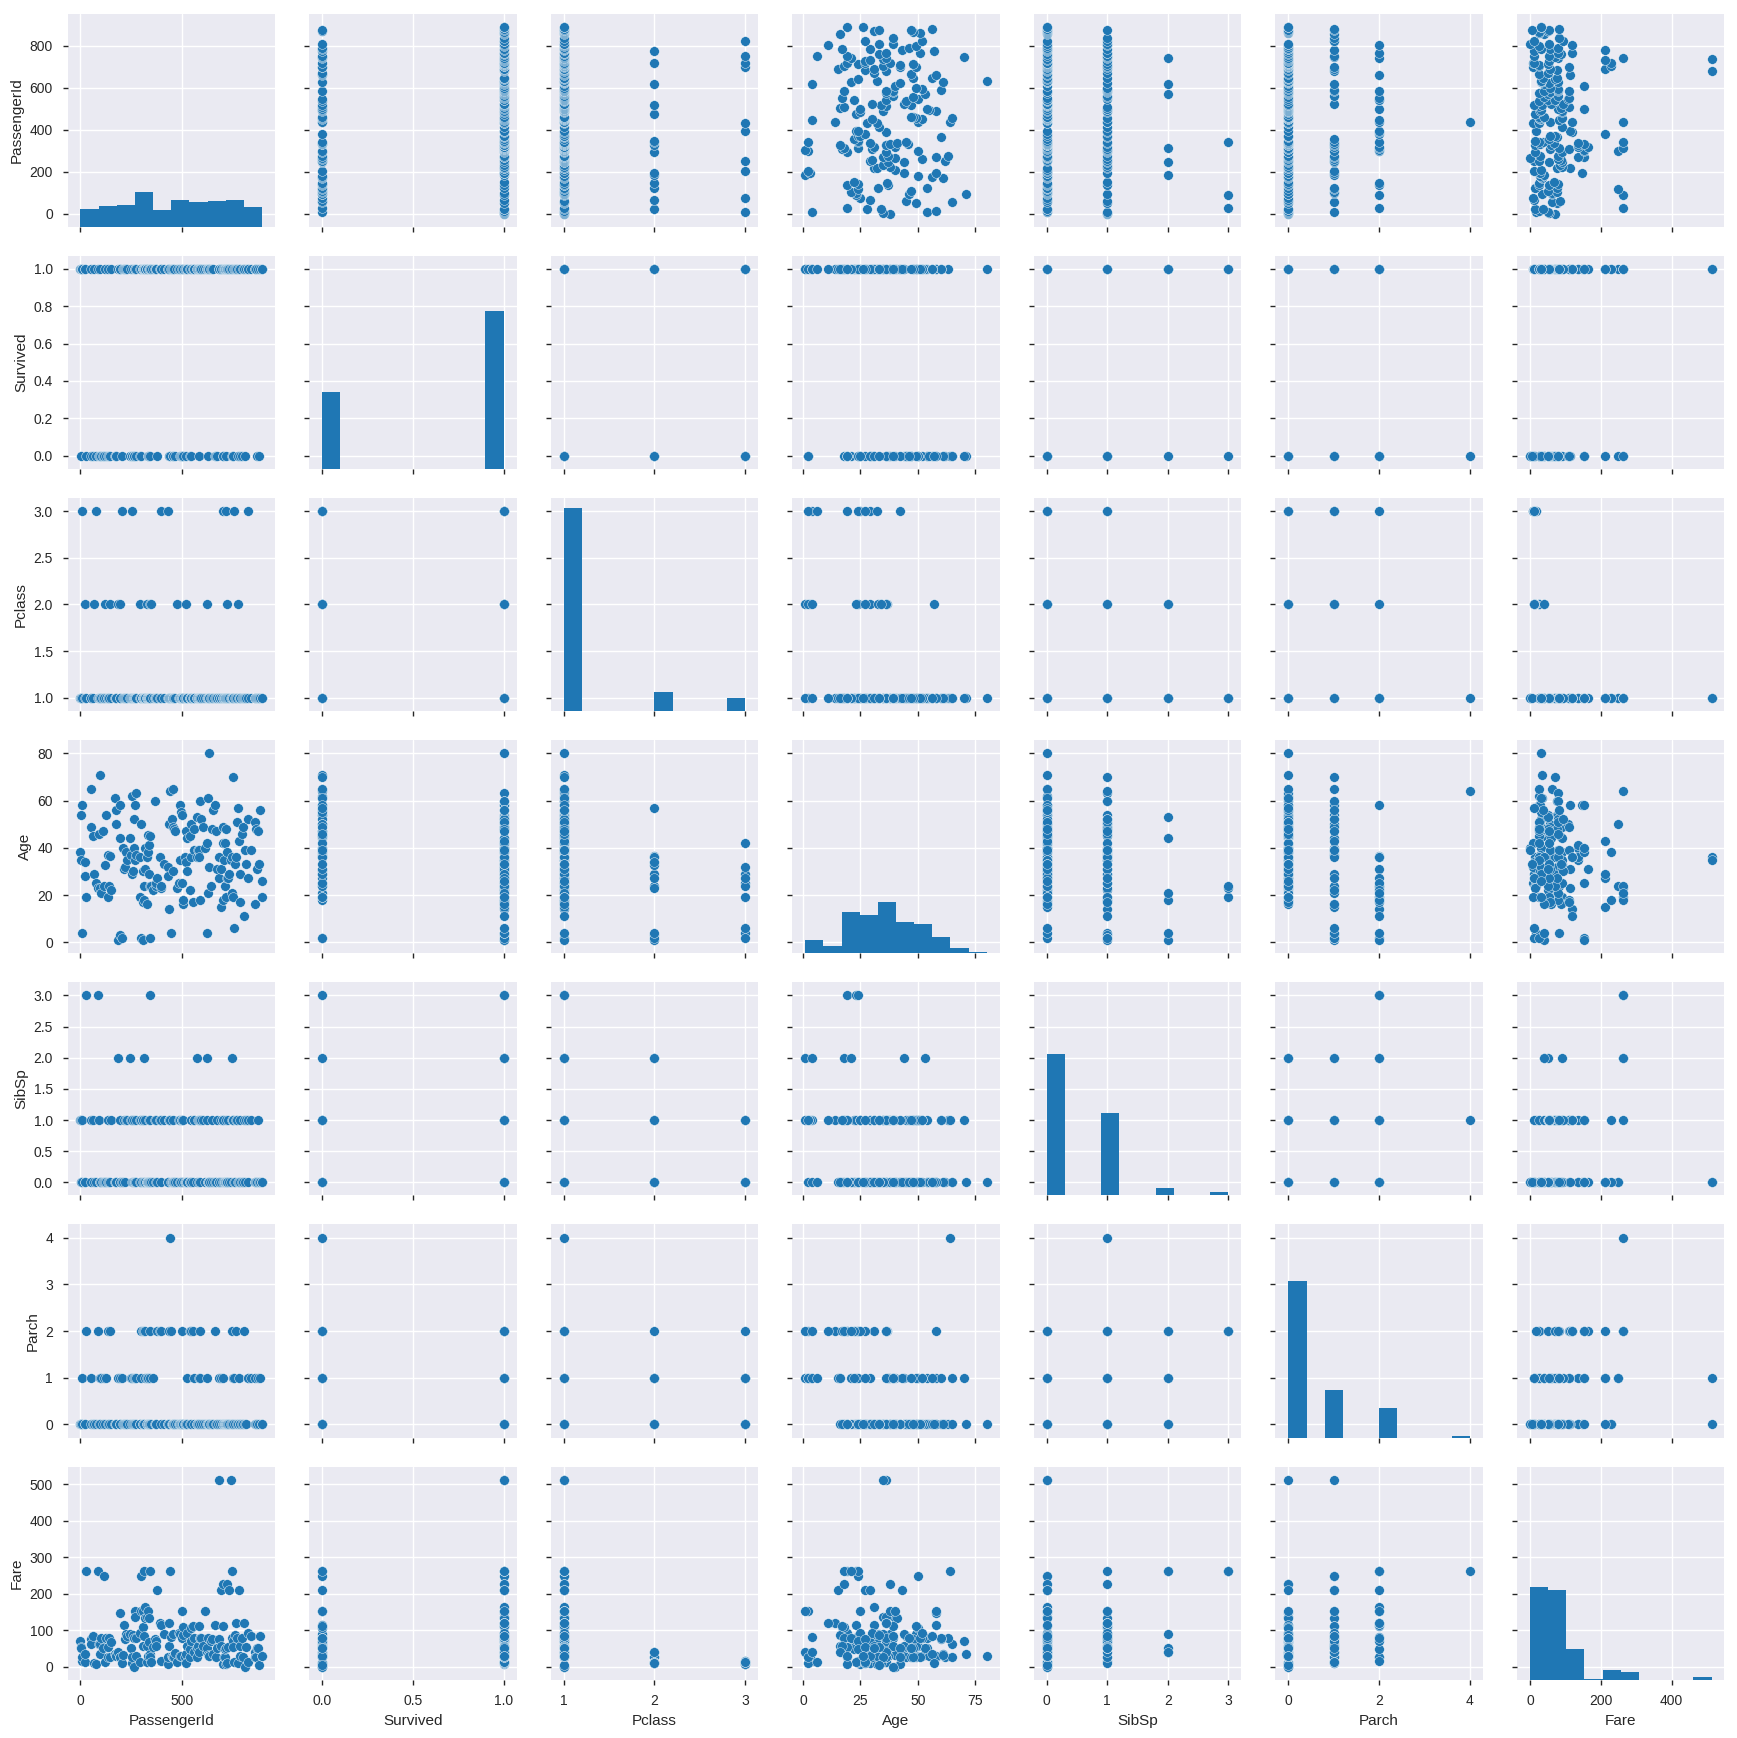

In [11]:
sns.pairplot(train_df.dropna())
plt.plot()

[]

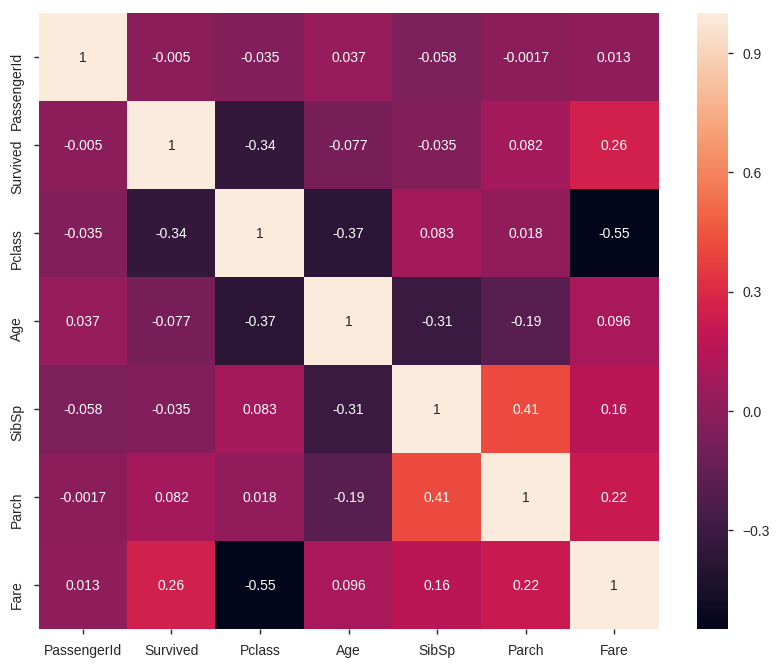

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, ax=ax)
plt.plot()

#### Survived

In [13]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

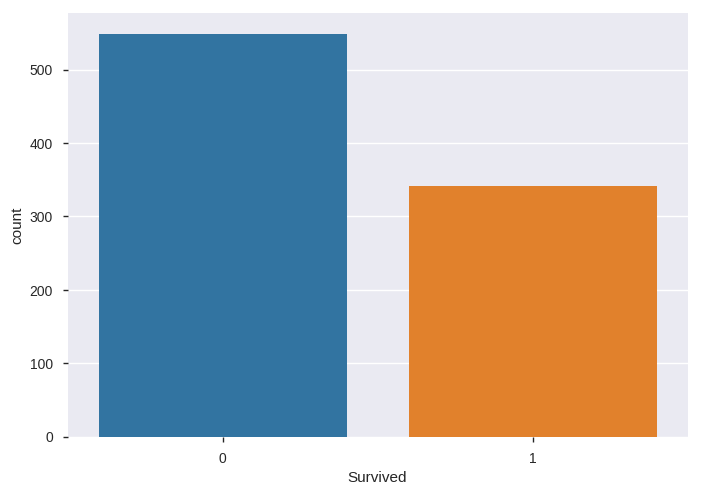

In [14]:
sns.countplot(train_df['Survived'])

**Вывод**  
Доля погибших в train dataset больше, чем выживших (549/342)

#### PassengerId

In [15]:
train_df['PassengerId'].unique().shape

(891,)

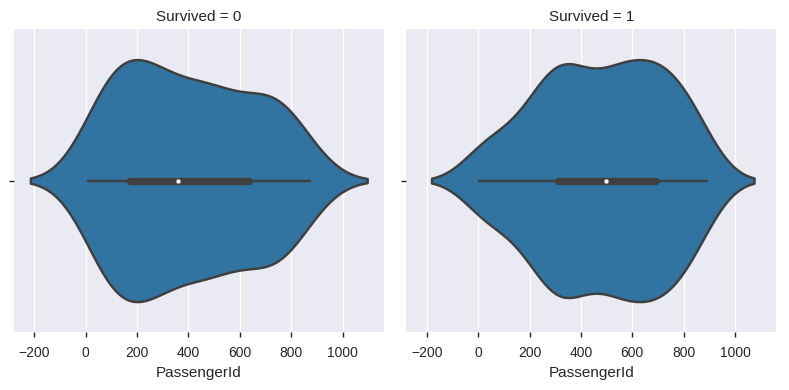

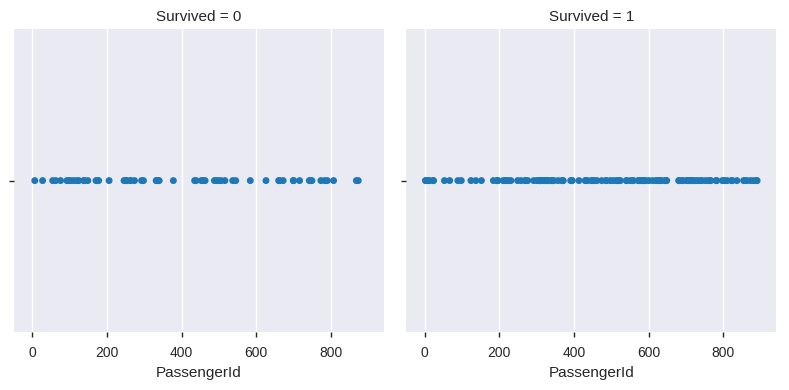

In [16]:
sns.factorplot(x='PassengerId', col='Survived', data=train_df.dropna(), kind='violin')
sns.factorplot(x='PassengerId', col='Survived', data=train_df.dropna(), kind='strip')

**Вывод**  
Данное поле имеет уникальное значение для каждой записи, и распределение данного значения относительно целевого признака, судя по всему, не имеет определенной структуры, в связи с чем не будет его использовать в качестве признака

#### Pclass

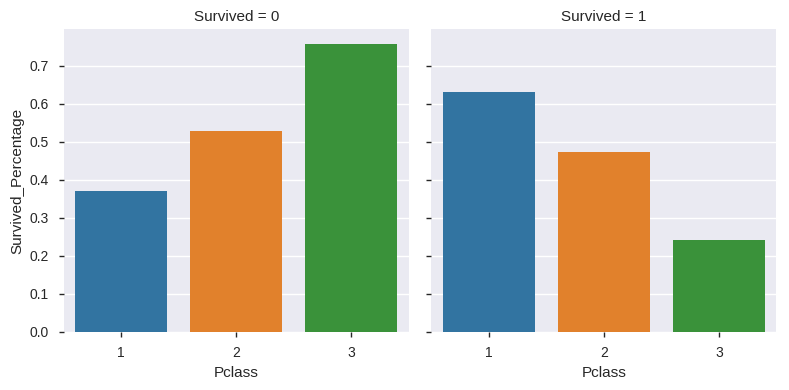

In [17]:
(train_df.groupby('Pclass')['Survived']
         .value_counts(normalize=True)
         .rename('Survived_Percentage')
         .reset_index()
         .pipe((sns.factorplot, 'data'), x='Pclass', y='Survived_Percentage', col='Survived', kind='bar'))
plt.show()

**Вывод**  
Исходя из графика, можно предположить - чем меньше номер класса, тем больше доля спасенных пассажиров этого класса
Используем этот признак  в дальнейшем.

#### Name

Titles

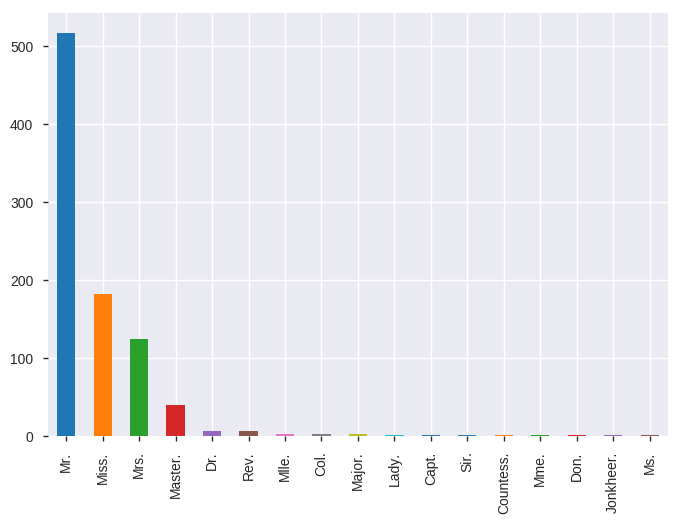

In [18]:
name_df = train_df[['Survived', 'Name', 'Sex']].copy()
name_df['Title'] = train_df['Name'].str.extract('\s+(\w+\.)\s+')
name_df['Title'].value_counts().plot.bar()

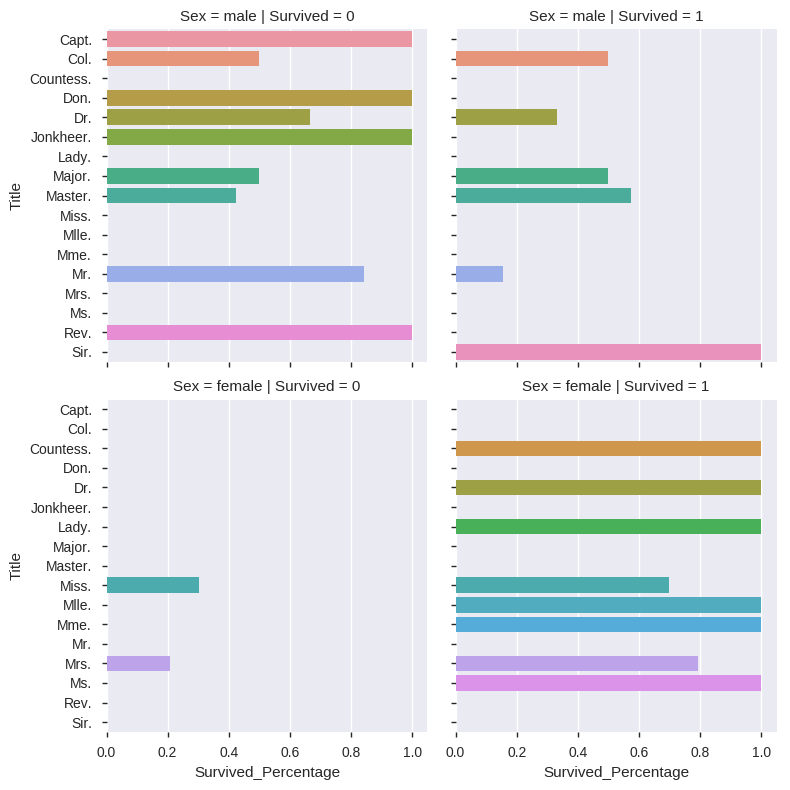

In [19]:
(name_df.groupby(['Title', 'Sex'])['Survived']
         .value_counts(normalize=True)
         .rename('Survived_Percentage')
         .reset_index()
         .pipe((sns.factorplot, 'data'), x='Survived_Percentage', y='Title', 
                                         row='Sex', col='Survived', kind='bar', orient='h'))

**Обозначения**  

**Capt. (Captain)** - Military  
**Col. (Colonel)** - Military  
**Countess. (Countess)** - Honorific Title  
**Don. (Don)** - Honorific Title (Spain, Portugal, Italy, Iberoamerica, and the Philippines)    
**Dr. (Doctor)** - Academic Title  
**Jonkheer. (Jonkheer)** - Honorific Title (Netherlands)    
**Lady. (Lady)** - Honorific Title (English)  
**Major. (Major)** - Military  
**Master. (Master)** - Form of address  
**Miss. (Miss)** - Form of address   
**Mlle. (Mademoiselle)** - Form of address (French)  
**Mme. (Madame)** - Form of address (French)  
**Mr. (Mister)** - Form of address  
**Mrs. (Mistress)** - Form of address   
**Ms. (???)** - Form of address  
**Rev. (Reverend)** - Honorific title   
**Sir. (Sir)** - Honorific title  

**Вывод**
- В имени присутствуют сокращения, относящиейся к званиям (ученые, военные), титулам, и признакам, женат/замужем ли пассажир или нет, а также примерную возрастную категорию
- Только пассажиры с сокращением Dr. (Doctor) - обоих полов
- Большая часть сокращений приходится только на 4 значения:
    - Mr.
    - Miss.
    - Mrs.
    - Master.  

Surname

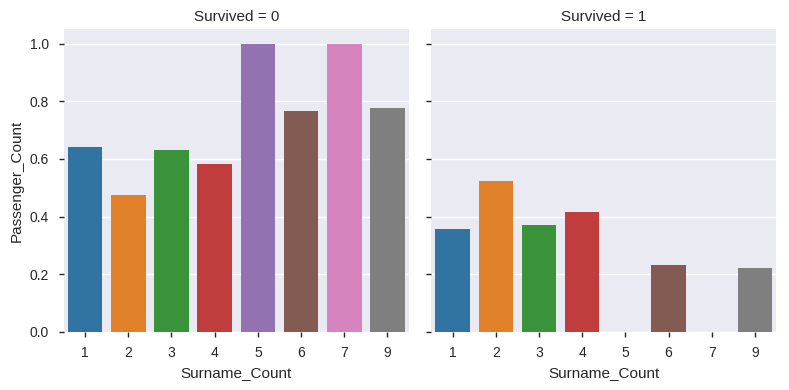

In [20]:
name_df['Surname'] = name_df['Name'].str.extract('(\w+),')
name_df['Surname_Count'] = name_df.groupby('Surname')['Survived'].transform('count')

(name_df.groupby('Surname_Count')['Survived']
        .value_counts(normalize=True)
        .rename('Passenger_Count')
        .reset_index()
        .pipe((sns.factorplot, 'data'), x='Surname_Count', y='Passenger_Count', col='Survived', kind='bar'))

**Выводы**
- Среди пассажиров с распространенными на борту фамилиями (>=5 пассажиров с одной фамилией), доля погибших заметно больше, чем у пассажиров с более редкими фамилиями (одинаковые фамилии - родственники или однофамильцы)

#### Sex

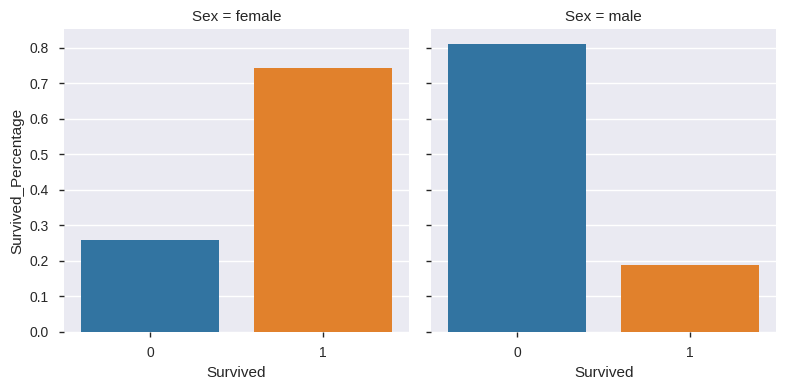

In [21]:
(train_df.groupby('Sex')['Survived']
         .value_counts(normalize=True)
         .rename('Survived_Percentage')
         .reset_index()
         .pipe((sns.factorplot, 'data'), x='Survived', y='Survived_Percentage', col='Sex', kind='bar'))
plt.show()

In [22]:
train_df.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

**Вывод**  
- В процентном отношении, доля погибших мужчин (81% среди всех мужчин) намного больше доли погибших женщин (26% среди всех женщин)

#### Age

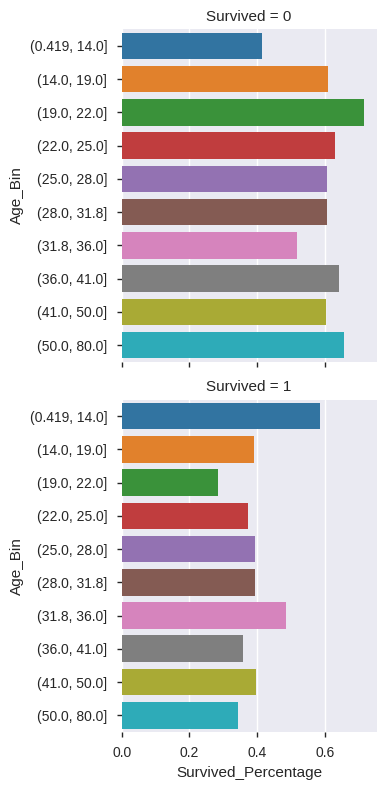

In [23]:
age_df = train_df[['Survived', 'Age']].copy()
age_df['Age_Bin'] = pd.qcut(age_df['Age'], 10)

(age_df.groupby('Age_Bin')['Survived']
         .value_counts(normalize=True)
         .rename('Survived_Percentage')
         .reset_index()
         .pipe((sns.factorplot, 'data'), x='Survived_Percentage', y='Age_Bin', row='Survived', 
                                         kind='bar', orient='h'))
plt.show()

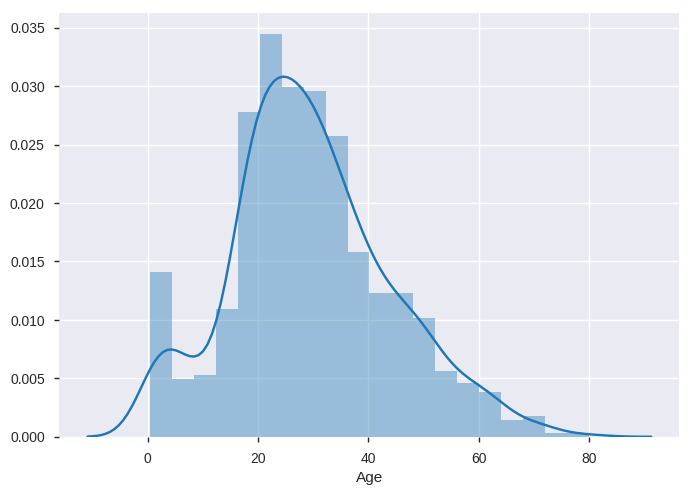

In [24]:
sns.distplot(train_df['Age'].dropna())

**Вывод**  
- В процентном отношении, больше всех выжило детей до 14 лет

#### SibSp

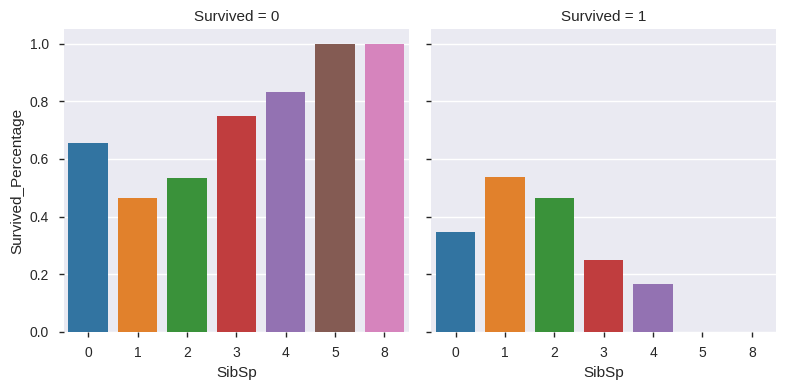

In [25]:
(train_df.groupby('SibSp')['Survived']
         .value_counts(normalize=True)
         .rename('Survived_Percentage')
         .reset_index()
         .pipe((sns.factorplot, 'data'), x='SibSp', y='Survived_Percentage', col='Survived', kind='bar'))
plt.show()

**Выводы**
- Пассажиров, у которых кол-во братьев/сестер равно 6 или 7, не было на борту
- Из пассажиров, у которых кол-во братьев/сестер больше или равно 5, не выжил никто

#### SibSp

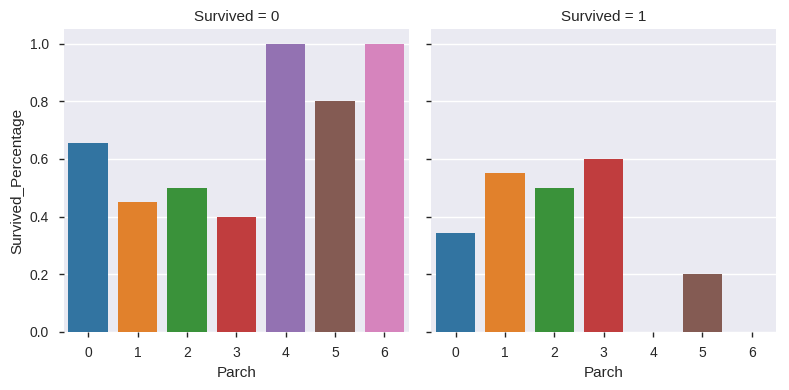

In [26]:
(train_df.groupby('Parch')['Survived']
         .value_counts(normalize=True)
         .rename('Survived_Percentage')
         .reset_index()
         .pipe((sns.factorplot, 'data'), x='Parch', y='Survived_Percentage', col='Survived', kind='bar'))
plt.show()

**Выводы**
- Из пассажиров, у которых кол-во родителей/детей равно 4 или 6, не выжил никто

#### Family_Size (Размер Семьи = SibSp + Parch + 1)

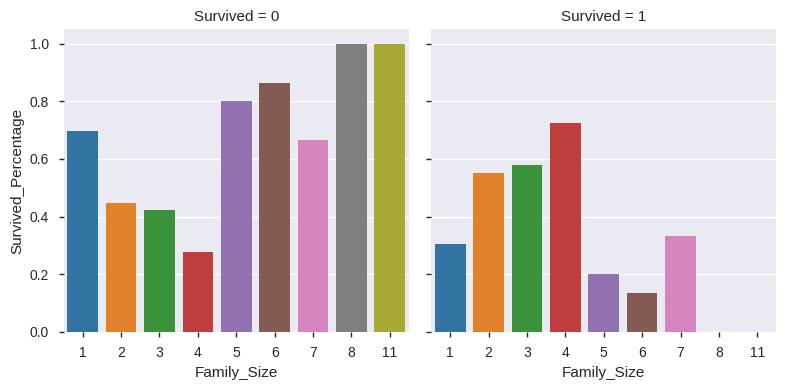

In [27]:
(train_df.assign(Family_Size = train_df['SibSp'] + train_df['Parch'] + 1)
        .groupby('Family_Size')['Survived']
        .value_counts(normalize=True)
        .rename('Survived_Percentage')
        .reset_index()
        .pipe((sns.factorplot, 'data'), x='Family_Size', y='Survived_Percentage', col='Survived', kind='bar'))

**Выводы**
- В больших семьях (>=5 человек) доля погибших очень большая (>=80%)

#### Ticket

In [28]:
train_df['Ticket'].value_counts()[:20]

1601            7
CA. 2343        7
347082          7
347088          6
CA 2144         6
3101295         6
S.O.C. 14879    5
382652          5
4133            4
19950           4
W./C. 6608      4
2666            4
347077          4
113760          4
LINE            4
349909          4
17421           4
113781          4
PC 17757        4
230080          3
Name: Ticket, dtype: int64

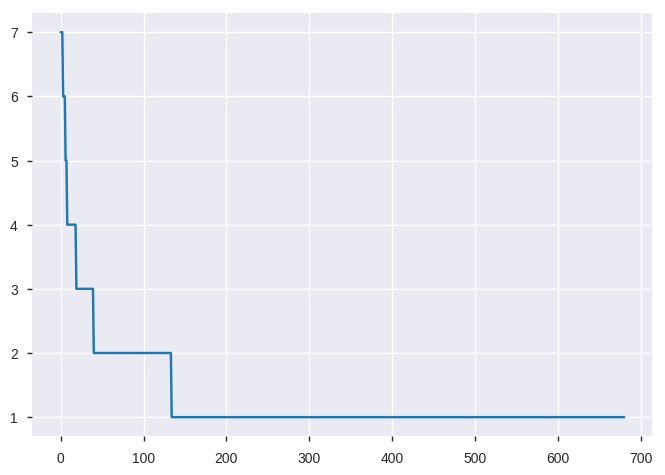

In [29]:
fig, ax = plt.subplots()
train_df['Ticket'].value_counts().reset_index().plot.line(ax=ax)
ax.legend('')

#### Вывод
- Номера билетов не имеют какой-то явной структуры
- Кол-во уникальных номеро билетов большое

В связи с этим, дальше данный признак использоваться не будет

#### Fare

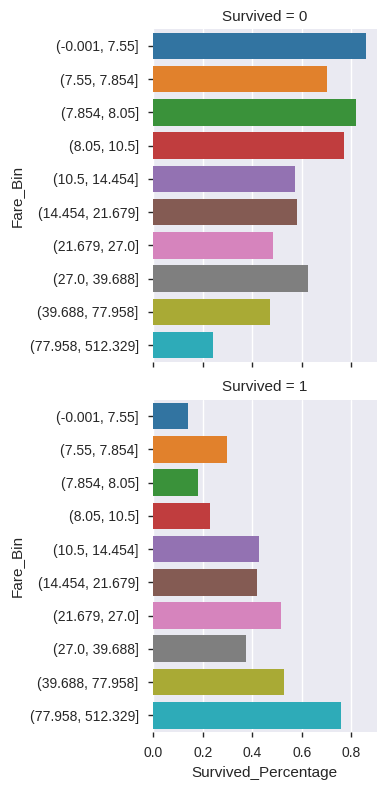

In [30]:
fare_df = train_df[['Survived', 'Fare']].copy()
fare_df['Fare_Bin'] = pd.qcut(fare_df['Fare'], 10)

(fare_df.groupby('Fare_Bin')['Survived']
         .value_counts(normalize=True)
         .rename('Survived_Percentage')
         .reset_index()
         .pipe((sns.factorplot, 'data'), x='Survived_Percentage', y='Fare_Bin', row='Survived', 
                                         kind='bar', orient='h'))
plt.show()

In [31]:
train_df[train_df['Fare'] <= 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


**Выводы**
- Чем выше стоимость билета, тем больше доля выживших пассажиров
- Среди тех, у кого стоимость билета равна нулевому значению, выжил только один пассажир

#### Cabin

In [32]:
cabin_df = train_df[['Survived', 'Cabin']].copy()
cabin_df['Cabin_Category'] = cabin_df['Cabin'].str.extract('(\w)\d+')
cabin_df['Cabin_Number'] = cabin_df['Cabin'].str.extract('\w(\d+)')
cabin_df.head()

,Survived,Cabin,Cabin_Category,Cabin_Number
0,0,NaN,NaN,NaN
1,1,C85,C,85
2,1,NaN,NaN,NaN
3,1,C123,C,123
4,0,NaN,NaN,NaN


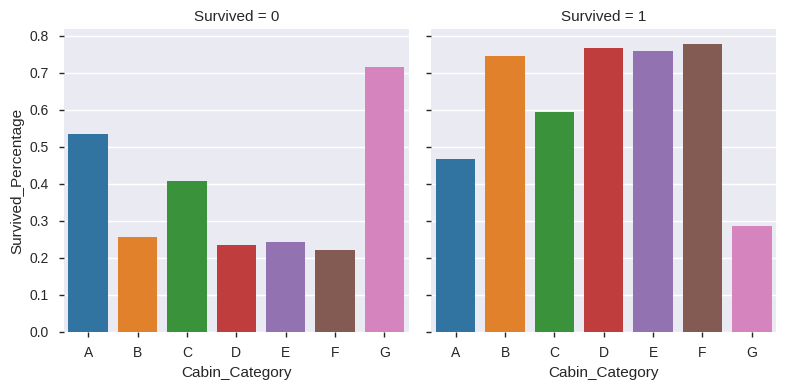

In [33]:
(cabin_df.groupby('Cabin_Category')['Survived']
         .value_counts(normalize=True)
         .rename('Survived_Percentage')
         .reset_index()
         .pipe((sns.factorplot, 'data'), x='Cabin_Category', y='Survived_Percentage', col='Survived', 
                                         kind='bar'))
plt.show()

In [34]:
cabin_df['Cabin_Number_Len'] = cabin_df['Cabin_Number'].str.len()

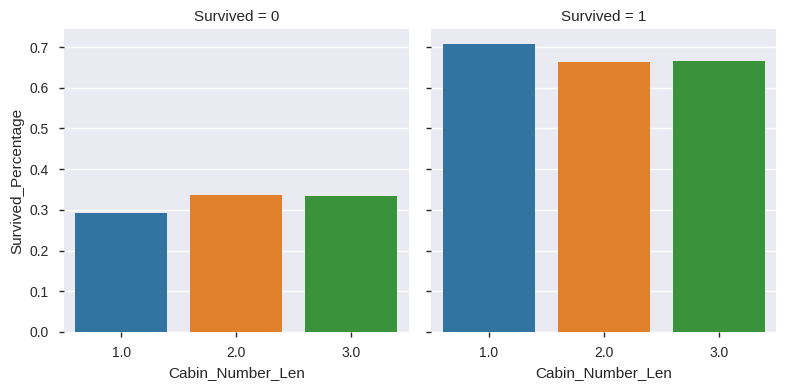

In [35]:
(cabin_df.groupby('Cabin_Number_Len')['Survived']
         .value_counts(normalize=True)
         .rename('Survived_Percentage')
         .reset_index()
         .pipe((sns.factorplot, 'data'), x='Cabin_Number_Len', y='Survived_Percentage', col='Survived', 
                                         kind='bar'))
plt.show()

#### Выводы
- В случае, если указана информация о номере каюты, вероятность того, что пассажир выживет, намного больше

#### Full_Info (Бинарный признак, что вся информация по пассажиру заполнена)

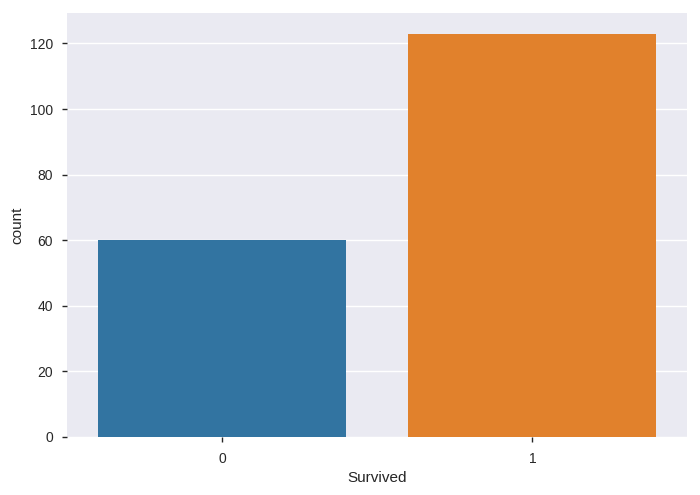

In [36]:
sns.countplot(train_df.loc[train_df.notnull().all(axis=1), 'Survived'])

In [37]:
full_info = train_df.notnull().all(axis=1).astype(int)
full_info.head()

0    0
1    1
2    0
3    1
4    0
dtype: int64

**Выводы**
- Доля выживших среди тех, по кому заполнена вся информации, в 2 раза больше, чем у тех пассажиров, по которым есть хотя бы одно пропущенное значение 

#### Embarked

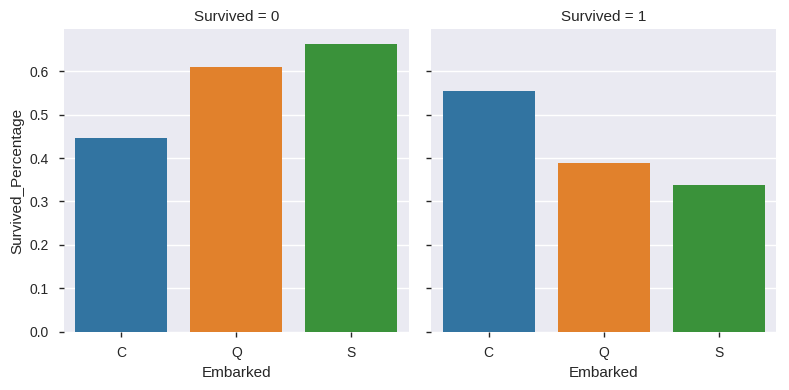

In [38]:
(train_df.groupby('Embarked')['Survived']
         .value_counts(normalize=True)
         .rename('Survived_Percentage')
         .reset_index()
         .pipe((sns.factorplot, 'data'), x='Embarked', y='Survived_Percentage', col='Survived', 
                                         kind='bar'))
plt.show()

**Выводы**
- Доля погибших, в зависимости от порта посадки (в порядке убывания):
    - Southampton
    - Queenstown
    - Cherbourg 

### Пропущенные значения

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Вывод**
- Поле Cabin в train и test datasets содержит меньше 25% заполненных значений
- Поле Fare только в test dataset содержит пропущенные значения 

### Выбор и преобразование/генерация признаков

Используем следующие признаки и преобразования для них (на основе train dataset): 
- Pclass  
    - Используем в оригинальном формате
- Sex
    - Преобразуем в бинарный признак (CategoricalEncoder)
- Age_Bin
    - Возьмем признак Age (ColumnExtractor)
    - Заполним пропущенные значения средним (SimpleImputer)
    - Нормализуем значение (StandardScaler)
    - ~~Преобразуем все значения в bins cо следующими точками разбиения - [0, 20, 40, 60, 80] (NumericBinner)~~
    - ~~Преобразуем полученный признак в порядковую переменную (CategoricalEncoder)~~
- Title
    - Возьмем признак Name (ColumnExtractor)
    - Получим title из имени, и создадим 5 категорий: 4 для самых популярных значений, и 1 - для всех остальных (Rare)
    - Преобразуем полученный признак в номинальную переменную (CategoricalEncoder)
- Family_Size
    - Возьмем признаки SibSp и Parch и на основе них посчитаем размер семьи пассажира (включая самого пассажира): SibSp + Parch + 1
- Fare_Bin
    - Возьмем признак Fare (ColumnExtractor)
    - Заполним пропущенные значения средним (SimpleImputer)
    - Нормализуем значение (StandardScaler)
    - ~~Преобразуем все значения в bins со следующими точками разбиения - [0, 100, 200, 300, 400, 513 (NumericBinner)~~
    - ~~Преобразуем полученный признак в порядковую переменную (CategoricalEncoder)~~
- Embarked
    - Заполним пропущенные значения наиболее частым значением (CategoricalImputer)
- Full_Info
    - Возьмем все признаки
    - Создадим бинарный признак, вся ли информация о пассажире заполнена (1) или нет (0) (FullInfoChecker)

In [41]:
X_train = train_df.drop('Survived', axis=1).copy()
y_train = train_df['Survived'].copy()

X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]

In [43]:
class CategoricalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, label=None):
        self.label = label
    
    def fit(self, X, y=None):
        if self.label:
            self.fill_values_ = self.label 
        else:
            self.fill_values_ = X.mode().iloc[0]
        return self
    
    def transform(self, X):
        return X.fillna(self.fill_values_).values

In [44]:
# При использовании pd.cut для binning и сохранением bin_features в fit, 
# при transform получаю следующую ошибку:
# ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
class NumericBinner(BaseEstimator, TransformerMixin):
    def __init__(self, bins):
        self.bins = bins
    
    def fit(self, X, y=None):
        self.bin_ranges_ = pd.cut(X, self.bins, labels=False, retbins=True)
        return self
    
    def transform(self, X):
        X_bin = pd.cut(X, self.bin_ranges_, labels=False, include_lowest=True)
        return X_bin

In [45]:
class ColumnSummator(BaseEstimator, TransformerMixin):
    def __init__(self, const=0):
        self.const = const
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_sum = X.sum(axis=1).reshape(-1, 1) + self.const
        return X_sum

In [46]:
class TitleExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, title_names):
        self.title_names = title_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if isinstance(X, pd.core.frame.DataFrame):
            X_ser = Series(X.values.ravel())
        elif isinstance(X, np.ndarray):
            X_ser = Series(X.ravel())
            
        titles = X_ser.str.extract('\s+(\w+)\.\s+')
        bin_titles = np.where(titles.isin(self.title_names), titles, 'Rare').reshape(-1, 1)
        
        return bin_titles

In [47]:
class FullInfoChecker(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        full_info = DataFrame(X).notnull().all(axis=1).astype(int).values.reshape(-1, 1)
        return full_info

In [48]:
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('pclass', Pipeline([
            ('extract', ColumnExtractor(columns=['Pclass']))
        ])),
        ('sex', Pipeline([
            ('extract', ColumnExtractor(columns=['Sex'])),
            ('to_ordered_cat', CategoricalEncoder(encoding='ordinal'))
        ])),
        ('embarked', Pipeline([
            ('extract', ColumnExtractor(columns=['Embarked'])),
            ('impute', CategoricalImputer()),
            ('to_ohe_cat', CategoricalEncoder('onehot-dense'))
        ])),
        ('age', Pipeline([
            ('extract', ColumnExtractor(columns=['Age'])),
            ('impute', SimpleImputer(strategy='mean')),
            ('normalize', StandardScaler()),
            #('bin', NumericBinner(bins=4)),
            #('to_ordered_cat', CategoricalEncoder(encoding='ordinal'))
        ])),
        ('fare', Pipeline([
            ('extract', ColumnExtractor(columns=['Fare'])),
            ('impute', SimpleImputer(strategy='mean')),
            ('normalize', StandardScaler()),
            #('bin', NumericBinner(bins=4)),
            #('to_ordered_cat', CategoricalEncoder(encoding='ordinal'))
        ])),
        ('title', Pipeline([
            ('extract', ColumnExtractor(columns=['Name'])),
            ('get_feature', TitleExtractor(title_names=['Mr', 'Miss', 'Mrs', 'Master'])),
            ('to_ohe_cat', CategoricalEncoder('onehot-dense'))
        ])),
        ('family_size', Pipeline([
            ('extract', ColumnExtractor(columns=['SibSp', 'Parch'])),
            ('sum', ColumnSummator(const=1))
        ])),
        ('full_info', Pipeline([
            ('get_feature', FullInfoChecker())
        ]))
    ])),
    ('clf', LogisticRegression())
])

### Поиск модели и подбор параметров с использованием кросс-валидации

Для выбора лучшей модели и поиска оптимальных параметров, используем следующие модели и параметры для проверки:
- DummyClassifier
    - Предсказание для всех наблюдений наиболее частого значения целевого признака
- KNeighborsClassifier
    - n_neighbors: 5, 10, 15, 20
- LogisticRegression
    - penalty: l1, l2
    - C: 0.001, 0.01, 0.1, 1, 10
- BernoulliNB
    - alpha: 0, 0.5, 1
- SVC
    - C: 0.001, 0.01, 0.1, 1, 10
    - kernel: rbf, linear
- DecisionTreeClassifier
    - criterion: gini, entropy
    - min_samples_leaf: 1, 3, 5
- RandomForestClassifier
    - n_estimators: 50, 100, 300, 500
    - criterion: gini, entropy
    - min_samples_leaf: 1, 3, 5
    
Поиск наилучшей модели осуществляется с помощью кросс-валидации (10-fold), используя метрику 'accuracy' (целевая метрика соревнования).  
Подбор параметров осуществляется по сетке указанных выше значений (GridSearchCV)

In [49]:
param_grid = [{'clf': [DummyClassifier(strategy='most_frequent')]},
              {'clf': [KNeighborsClassifier()],
               'clf__n_neighbors': [5, 10, 15, 20]},
              {'clf': [LogisticRegression()], 
               'clf__penalty': ['l1', 'l2'], 
               'clf__C': np.logspace(-3, 1, num=5)},
              {'clf': [BernoulliNB()],
               'clf__alpha': [0, 0.5, 1]},
              {'clf': [SVC()],
               'clf__C': np.logspace(-3, 1, num=5),
               'clf__kernel': ['rbf', 'linear']},
              {'clf': [DecisionTreeClassifier()],
               'clf__criterion': ['gini', 'entropy'],
               'clf__min_samples_leaf': [1, 3, 5]},
              {'clf': [RandomForestClassifier()],
               'clf__n_estimators': [50, 100, 300, 500],
               'clf__criterion': ['gini', 'entropy'],
               'clf__min_samples_leaf': [1, 3, 5, 7]}]

grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

/home/dlabazkin/miniconda3/envs/otus/lib/python3.6/site-packages/sklearn/model_selection/_search.py:718: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


({'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False),
  'clf__criterion': 'entropy',
  'clf__min_samples_leaf': 5,
  'clf__n_estimators': 50},
 0.8417508417508418)

In [50]:
best_model = grid_search.best_estimator_
best_model

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pclass', Pipeline(memory=None,
     steps=[('extract', ColumnExtractor(columns=['Pclass']))])), ('sex', Pipeline(memory=None,
     steps=[('extract', ColumnExtractor(columns=['Sex'])), ('to_ordered_cat', CategoricalEncoder(categor...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

### Обучение выбранной модели на всей обучающей выборке и предсказание на тестовых данных

In [51]:
y_pred = best_model.fit(X_train, y_train).predict(test_df)
y_pred.shape

(418,)

In [52]:
result_df = DataFrame({'PassengerId': test_data['PassengerId'],
                       'Survived': y_pred})
result_df.to_csv('./data/submission.csv', index=False)

### Загрузка данных на Kaggle

In [53]:
!kaggle competitions submit -c titanic -f ./data/submission.csv -m "RandomForest"

Successfully submitted to Titanic: Machine Learning from Disaster

In [54]:
!kaggle competitions submissions -c titanic

fileName               date                 description         status    publicScore  privateScore  
---------------------  -------------------  ------------------  --------  -----------  ------------  
submission.csv         2018-05-14 21:35:06  RandomForest        complete  0.79425      None          
submission.csv         2018-05-14 21:32:10  RandomForest        complete  0.78947      None          
submission.csv         2018-05-14 21:28:23  RandomForest        complete  0.80382      None          
submission.csv         2018-05-14 20:46:03  SVC                 complete  0.79425      None          
submission.csv         2018-05-14 20:25:39  SVC                 complete  0.78947      None          
submission.csv         2018-05-14 14:28:32  SVC                 complete  0.78947      None          
submission.csv         2018-05-14 14:12:42  XGB                 complete  0.76076      None          
submission.csv         2018-05-14 14:06:10  XGB                 complete  0.75119 